# SQL 的五十道練習

> 簡介

[數據交點](https://www.datainpoint.com/) | 郭耀仁 <yaojenkuo@datainpoint.com>

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 什麼是 SQL？

## SQL（發音為 ess-que-ell 或 sequel）全名為 Structured Query Language，是一個能夠針對資料庫進行「資料操作」的語言。

## 「資料操作」涵蓋了 CRUD 這四個動詞：

- 創造 **C**reate
- 查詢 **R**ead
- 更新 **U**pdate
- 刪除 **D**elete

## 舉例來說，在使用任何的網頁或手機應用程式時，我們的滑鼠點擊與手勢觸控都會被轉換成 CRUD：

- 創造 **C**reate：發佈新的動態。
- 查詢 **R**ead：瀏覽追蹤對象的動態。
- 更新 **U**pdate：編輯先前發佈動態的內容。
- 刪除 **D**elete：撤掉先前所發佈的動態。

## 為什麼要學習 SQL？

SQL 是一個歷久彌新的語言，早於 1970 年代問世，50 年後今日仍然是資料科學與軟體開發從業者最重要的技能之一。

## 2020 Kaggle ML&DS Survey 中 SQL 在資料科學家日常頻繁使用語言中排名第二。

Source: <https://www.kaggle.com/c/kaggle-survey-2020>

In [2]:
from ks2020 import KaggleSurvey2020

def plot_kaggle():
    kaggle_survey_2020 = KaggleSurvey2020('kaggle_survey_2020_responses.csv')
    kaggle_survey_2020.plot_summary('Q7')

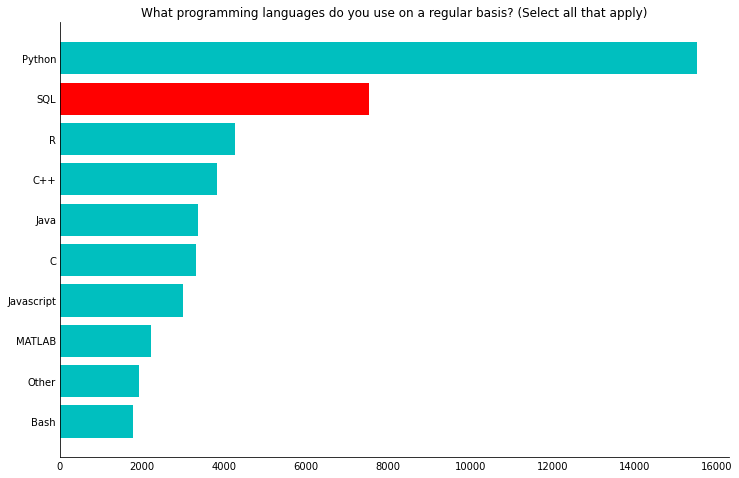

In [3]:
plot_kaggle()

## Stack Overflow 2020 Developer Survey 中 SQL 在軟體工程師受歡迎技術中排名第三。

Source: <https://insights.stackoverflow.com/survey/2020>

In [4]:
def plot_so():
    so = pd.read_csv('survey_results_public.csv')
    lang_counts = {'NaN': 0}
    for l in so['LanguageWorkedWith'].str.split(";"):
        if isinstance(l, list):
            for i in l:
                if i in lang_counts.keys():
                    lang_counts[i] += 1
                else:
                    lang_counts[i] = 1
        elif np.isnan(l):
            lang_counts['NaN'] += 1
    del lang_counts['NaN']
    ser = pd.Series(lang_counts)
    ser = ser.sort_values()[-10:]
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = ['c' for _ in range(ser.size)]
    colors[-3] = 'r'
    ax.barh(ser.index, ser.values, color=colors)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(length=0)
    ax.set_title('Which programming, scripting, and markup languages have you done extensive development work in over the past year,\n and which do you want to work in over the next year?')
    plt.show()

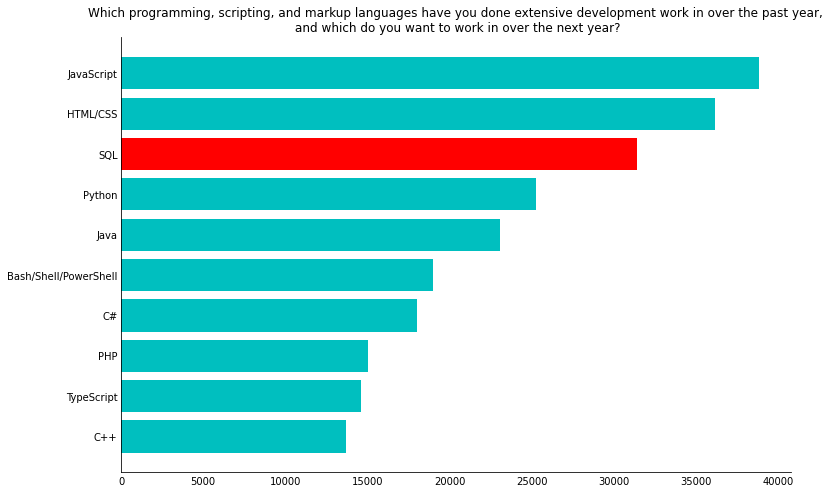

In [5]:
plot_so()

## 什麼是資料庫？

## 資料庫（Database）是儲存在電腦中的資料集合，我們可以透過撰寫 SQL 有效率地對資料庫中的數據進行「資料操作」。

## 什麼樣的資料集合能夠格被稱為資料庫呢？

## 具有兩個特徵的資料集合被稱為資料庫：

1. 觀測值必須具有屬性。
2. 資料集合必須具備有元資料（Metadata）。

In [6]:
def show_without_attributes():
    conn = sqlite3.connect('../databases/imdb.db')
    df = pd.read_sql("""SELECT * FROM movies LIMIT 5;""", conn)
    return df.loc[:, ].values

## 不具有屬性的資料觀測值

In [7]:
show_without_attributes()

array([[1, 'The Shawshank Redemption', 1994, 9.3, 'Frank Darabont', 142],
       [2, 'The Godfather', 1972, 9.2, 'Francis Ford Coppola', 175],
       [3, 'The Godfather: Part II', 1974, 9.0, 'Francis Ford Coppola',
        202],
       [4, 'The Dark Knight', 2008, 9.0, 'Christopher Nolan', 152],
       [5, '12 Angry Men', 1957, 9.0, 'Sidney Lumet', 96]], dtype=object)

## 具有屬性的資料觀測值

In [8]:
def show_with_attributes():
    conn = sqlite3.connect('../databases/imdb.db')
    df = pd.read_sql("""SELECT * FROM movies LIMIT 5;""", conn)
    return df

In [9]:
show_with_attributes()

,id,title,release_year,rating,director,runtime
0,1,The Shawshank Redemption,1994,9.3,Frank Darabont,142
1,2,The Godfather,1972,9.2,Francis Ford Coppola,175
2,3,The Godfather: Part II,1974,9.0,Francis Ford Coppola,202
3,4,The Dark Knight,2008,9.0,Christopher Nolan,152
4,5,12 Angry Men,1957,9.0,Sidney Lumet,96


## 元資料（Metadata）常見的解釋為「data about data」、「描述資料的資料」。

In [12]:
def show_metadata():
    conn = sqlite3.connect('../databases/imdb.db')
    df = pd.read_sql("""SELECT * FROM PRAGMA_TABLE_INFO('movies');""", conn)
    return df

In [13]:
show_metadata()

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,title,TEXT,0,None,0
2,2,release_year,INTEGER,0,None,0
3,3,rating,REAL,0,None,0
4,4,director,TEXT,0,None,0
5,5,runtime,INTEGER,0,None,0


## 為什麼資料庫是重要的？

小至手機的通話紀錄與通訊錄、大至銀行的存款資訊與交易資訊，背後都有資料庫在運作。

## 什麼是資料庫管理系統？

## DBMS 全名為 DataBase Management System，透過資料庫管理系統，SQL 將能「自動化」且「規模化」地對資料庫進行 CRUD 的「資料操作」。

## 自動化的體現

不需要透過人工、客服就能夠發佈新的動態、瀏覽追蹤對象的動態、編輯先前發佈動態的內容與撤掉先前所發佈的動態。

## 規模化的體現

能夠讓成千上萬個使用者同時發佈新的動態、瀏覽追蹤對象的動態、編輯先前發佈動態的內容與撤掉先前所發佈的動態。

## 資料庫管理系統可以分為兩大類：

1. 關聯式資料庫管理系統（RDBMS, Relational Database Management System）
2. 非關聯式資料庫管理系統（NoSQL DBMS, Not only SQL Database Management System）

## 常見的關聯式資料庫管理系統

- 甲骨文（Oracle）的 Oracle Database
- 微軟（Microsoft）的 SQL Server
- 國際商業機器（IBM）的 DB2
- 開放原始碼的 SQLite
- 開放原始碼的 MySQL
- 開放原始碼的 PostgreSQL

## 課程使用開放原始碼的 SQLite

以常見關聯式資料庫管理系統都支援的標準 SQL 基本語法為主。

## SQL、關聯式資料庫與關聯式資料庫管理系統的示意圖

![](sql_rdb_rdbms.png)

## 重點統整

- SQL 全名為 Structured Query Language，是能夠針對資料庫進行「資料操作」的語言。
- 資料庫是儲存在電腦中的資料集合，具有兩個特徵：
    - 資料觀測值具有屬性。
    - 儲存有元資料（Metadata）。
- 透過資料庫管理系統，SQL 能**自動化**且**規模化**地對資料庫進行「資料操作」。